In [54]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
sns.set_theme(style="darkgrid")

In [56]:
# read all the results
df_results = pd.read_csv( "papers/msd/results.csv" )

# select the testing results
test_results = df_results[df_results["split"] == "test"]

# get the list of the datasets 
datasets = list(df_results["dataset"].unique())

print( datasets )

['mass', 'mros', 'dcsm', 'mesa', 'hmc']


### Plot the mean accuracy varying k

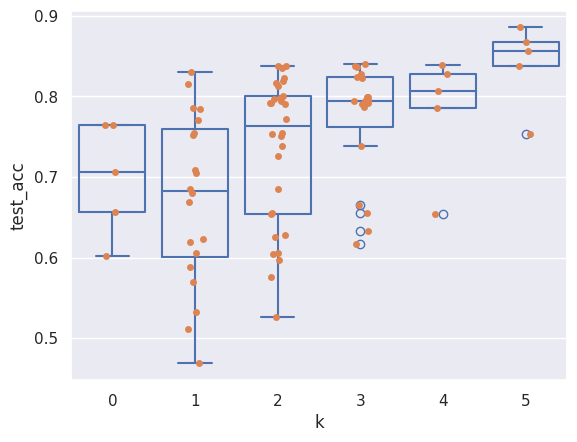

In [57]:
# include the k = n results into the thest results as upper bound
mean_varying_k = pd.concat([test_results, df_results[df_results["k"] == len(datasets)]])

sns.boxplot(data=mean_varying_k, x="k", y="test_acc", fill=False)
sns.stripplot(data=mean_varying_k, x="k", y="test_acc")
# save plot in high resolution
plt.savefig("papers/msd/mean_varying_k.png", dpi=300)

# display plot
plt.show()

plt.close()

### Plot the mean accuracy varying k considering the big datasets only


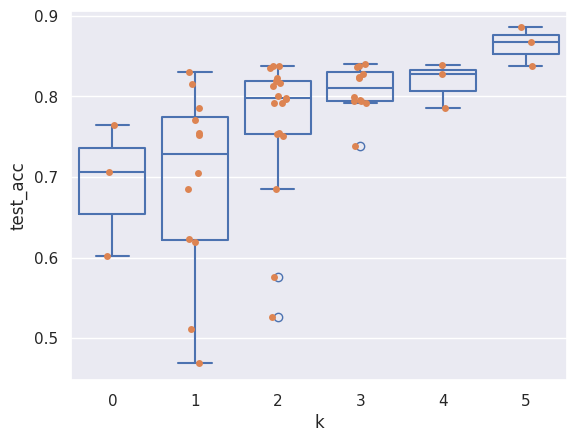

In [58]:
# include the k = n results into the thest results as upper bound
mean_varying_k = pd.concat([test_results, df_results[df_results["k"] == len(datasets)]])

mean_varying_k = mean_varying_k[ mean_varying_k["dataset"].isin(["mros", "mesa", "dcsm"])]

sns.boxplot(data=mean_varying_k, x="k", y="test_acc", fill=False)
sns.stripplot(data=mean_varying_k, x="k", y="test_acc")
plt.savefig("papers/msd/mean_varying_k_big.png", dpi=300)
# display plot
plt.show()

plt.close()

### Results removing HMC only

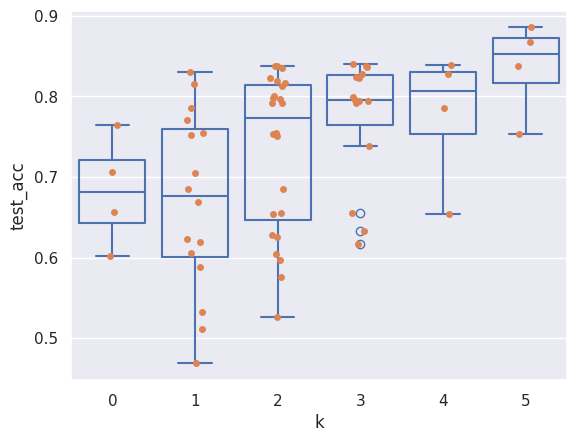

In [59]:
# include the k = n results into the thest results as upper bound
mean_varying_k = pd.concat([test_results, df_results[df_results["k"] == len(datasets)]])

mean_varying_k = mean_varying_k[ mean_varying_k["dataset"].isin(["mros", "mesa", "dcsm", "hmc"])]

sns.boxplot(data=mean_varying_k, x="k", y="test_acc", fill=False)
sns.stripplot(data=mean_varying_k, x="k", y="test_acc")
plt.savefig("papers/msd/mean_varying_k_no_hmc.png", dpi=300)
# display plot
plt.show()
plt.close()

### Compare k=0 vs k=(n-1) vs k=(n)

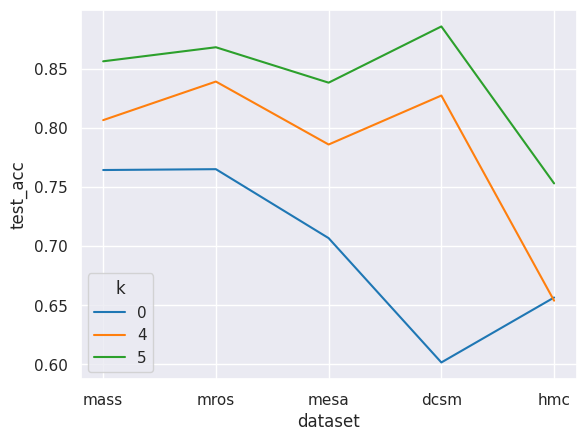

In [60]:
compare_df = test_results[ test_results["k"].isin( [0, len(datasets) - 1 ])]

# add the k = n results to the comparison
compare_df = pd.concat([compare_df, df_results[df_results["k"] == len(datasets)]])

# set the order of the datasets
compare_df["dataset"] = pd.Categorical(compare_df["dataset"], ["mass", "mros", "mesa", "dcsm", "hmc"])
sns.lineplot(
    data=compare_df,
    x="dataset",
    y="test_acc",
    hue="k",
    markers=True,
    dashes=False,
    palette="tab10",
    legend=True,
    err_style="bars",
)
plt.savefig("papers/msd/k=0_vs_k=(n-1)_vs_k=n.png", dpi=300)
plt.show()
plt.close()